# **Entorno**

In [24]:
# https://www.properati.com.ar/data
#! wget -O ar_properties.csv.gz -q https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
#! gzip -d -f ./ar_properties.csv.gz

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import datetime

import warnings
warnings.filterwarnings('ignore')

import re


In [26]:
pd.options.display.max_colwidth = 50

# Lectura de datos

In [27]:
#df_properties = pd.read_csv('../ar_properties.csv', index_col="id")
#df_apred = pd.read_csv('../a_predecir.csv', index_col="id")

In [28]:
df = df_properties.copy()
df_pred = df_apred.copy()

In [29]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,NaN,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,NaN,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,NaN,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [30]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 1 to 1087
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_type          1087 non-null   object 
 1   start_date       1087 non-null   object 
 2   end_date         1087 non-null   object 
 3   created_on       1087 non-null   object 
 4   lat              1087 non-null   float64
 5   lon              1087 non-null   float64
 6   l1               1087 non-null   object 
 7   l2               1087 non-null   object 
 8   l3               1087 non-null   object 
 9   rooms            1083 non-null   float64
 10  bedrooms         958 non-null    float64
 11  bathrooms        1083 non-null   float64
 12  surface_total    1087 non-null   float64
 13  surface_covered  1087 non-null   float64
 14  price            0 non-null      float64
 15  currency         1087 non-null   object 
 16  price_period     0 non-null      float64
 17  title         

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, DyVXfkpKygVBKuUk5olH+A== to rEynGyGrrsxNeG0ib5vUBA==
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ad_type          1000000 non-null  object 
 1   start_date       1000000 non-null  object 
 2   end_date         1000000 non-null  object 
 3   created_on       1000000 non-null  object 
 4   lat              894233 non-null   float64
 5   lon              894191 non-null   float64
 6   l1               1000000 non-null  object 
 7   l2               1000000 non-null  object 
 8   l3               965273 non-null   object 
 9   l4               306162 non-null   object 
 10  l5               5530 non-null     object 
 11  l6               0 non-null        float64
 12  rooms            714179 non-null   float64
 13  bedrooms         649933 non-null   float64
 14  bathrooms        765122 non-null   float64
 15  surface_total    477831 non-nul

# Limpieza (Outliers, Nulls, Filtros)

In [32]:
# Me quedo solo con CABA
df = df.loc[df["l1"] == "Argentina"]

## Nulls

Del df entrenamiento vamos a dropear los na en lon y lat

In [33]:
df.dropna(subset=["lon"],inplace=True)
df.dropna(subset=["lat"],inplace=True)
df.dropna(subset=["l3"],inplace = True)
df.dropna(subset=["price"],inplace=True)
df.dropna(subset=["currency"],inplace=True)

Con superficie y los distintos ambientes vamos a completar los nulls

In [34]:
df.drop(df.loc[(df.rooms.isnull()) & (df.bedrooms.isnull()) & (df.bathrooms.isnull()) & (df.surface_total.isnull()) & (df.surface_covered.isnull())].index, inplace=True)

In [35]:
df.rooms.fillna(0,inplace=True)
df_pred.rooms.fillna(0,inplace=True)

df.bedrooms.fillna(0,inplace=True)
df_pred.bedrooms.fillna(0,inplace=True)

df.bathrooms.fillna(0,inplace=True)
df_pred.bathrooms.fillna(0,inplace=True)

Ahora completamos la superficie total y cubierta

In [36]:
df.loc[(df.surface_covered > 0) & (df.surface_total.isnull()),["surface_total"]] = df.loc[(df.surface_covered > 0) & (df.surface_total.isnull()),["surface_covered"]]
df.loc[(df.surface_covered > 0) & (df.surface_total == 0),["surface_total"]] = df.loc[(df.surface_covered > 0) & (df.surface_total.isnull()),["surface_covered"]]
df.loc[(df.surface_total > 0) & (df.surface_covered.isnull()),["surface_covered"]] = 0

In [37]:
df.surface_covered.fillna(0,inplace=True)
df.surface_total.fillna(0,inplace=True)

## Longitud y Latitud

In [38]:
lon_min_max = (58.532674897063565, 58.338011418419356 ) #Limites Este/Oeste de CABA
lat_min_max = (34.7058110012102, 34.531639) #Limites Norte/Sur de CABA

Acomodo lon y lat de los datos a predecir, como no podemos dropear los na y outliers les vamos a asignar el valor que corresponda.

In [39]:
df_pred[["lat","lon"]] = df_pred[["lon","lat"]] # Los invertimos ya que se encontraban al revez

In [40]:
# Establezco el valor absoluto de los campos
df_pred["lon"] = abs(df_pred["lon"]) 
df_pred["lat"] = abs(df_pred["lat"]) 

In [41]:
# Lo que este fuera de la longitu y latitud maxima de CABA es outlier
df_pred["lat_outlier"] = df_pred.lat.apply(lambda x: 0 if (x < lat_min_max[0]) & (x > lat_min_max[1]) else 1)
df_pred["lon_outlier"] = df_pred.lon.apply(lambda x: 0 if (x < lon_min_max[0]) & (x > lon_min_max[1]) else 1)

In [42]:
#Buscamos la longitud y latitud de los outliers según lo que vemos en el titulo de la publicación
df_pred.loc[422,"lat"] = 34.628212
df_pred.loc[873,"lat"] = 34.557626
df_pred.loc[1055,"lat"] = 34.601223
df_pred.loc[1057,"lat"] = 34.557626
df_pred.loc[422,"lon"] = 58.426367
df_pred.loc[873,"lon"] = 58.484324
df_pred.loc[1055,"lon"] = 58.376599
df_pred.loc[1057,"lon"] = 58.484324

df_pred.loc[1057,"lat"] = 34.580921

In [43]:
df_pred.drop(columns=["lat_outlier","lon_outlier"], inplace=True)

## Barrios

In [44]:
df_pred.loc[(df_pred.l3 == "GBA Norte") | (df_pred.l3 == "2 Ambientes"), ["l3","title"]]

,l3,title
id,,
133,2 Ambientes,Avenida Coronel Niceto Vega 5100 - PH en Venta...
1010,GBA Norte,"Melo Al 4000 - PH en Venta en Vicente López, V..."


Vemos que en el set de datos a predecir hay 2 registros que tienen valores atipicos en el barrio, asi que corregimos.

In [45]:
df_pred.loc[133,["l3"]] = "Palermo"

df_pred.loc[1010,["l3"]] = "Vicente López"

## Precio y moneda

In [46]:
df = df.loc[df["currency"] == "USD"]

df.drop(columns = ["currency"], inplace = True )

## Tipo de propiedad

In [47]:
df["property_type_check"] = df.property_type.apply(lambda x: 1 if x in ("Departamento","PH") else 0)

df = df.loc[df["property_type_check"] == 1]

df.drop(columns = "property_type_check", inplace = True)

## Superficie total y cubierta

In [48]:
df.loc[(df.surface_total < 0), ["surface_total"]] = abs(df.loc[(df.surface_total < 0), ["surface_total"]])
df.loc[(df.surface_covered < 0), ["surface_covered"]] = abs(df.loc[(df.surface_covered < 0), ["surface_covered"]])

## Elimino las columnas que no utilizo

In [49]:
df.drop(columns = ["ad_type","l4","l5", "l6", "created_on","start_date", "end_date","l1","l2","price_period","operation_type"], inplace = True )

In [50]:
df.drop_duplicates(inplace = True)

In [51]:
df_pred.drop(columns = ["ad_type","l4","l5", "l6", "created_on","start_date", "end_date","l1","l2","price_period","operation_type","currency","price_period","services"], inplace = True )
#df_pred.drop(columns = ["title","description","details","additionals"], inplace = True)

# Feature Engineering

Uno los dos data frames

In [52]:
df_total = pd.concat([df,df_pred], axis=0)

## Dummies

In [53]:
df_total.select_dtypes(include = "object").columns

Index(['l3', 'title', 'description', 'property_type', 'details',
       'additionals'],
      dtype='object')

In [54]:
df_total.drop(columns=['title', 'description', 'details','additionals'], inplace=True)

In [55]:
df_total = pd.get_dummies(df_total, columns = [ "property_type"])

## Dividimos los DF

In [56]:
df = df_total[df_total.index.isin(df.index)]
df_pred = df_total[df_total.index.isin(df_pred.index)]

In [57]:
barrios = df_pred.l3.unique()

df["barrio_ok"] = df.l3.apply(lambda x: 1 if x in barrios else 0)

df = df.loc[df["barrio_ok"] == 1]

df.drop(columns = "barrio_ok", inplace = True)

In [58]:
barrios

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', 'Mataderos', 'Villa Santa Rita',
       'Parque Patricios', 'Parque Chas', 'Villa General Mitre', 'Retiro',
       'Parque Avellaneda', 'Monte Castro', 'Parque Chacabuco',
       'Villa Luro', 'Versalles', 'Coghlan', 'Vélez Sarsfield',
       'Nueva Pompeya', 'Agronomía', 'Villa Real', 'Vicente López'],
      dtype=object)

# Modelización

## Random Forest

In [66]:
X_pred = df_pred.loc[df_pred.l3 == "Balvanera"][df_pred.columns.drop("l3")]

df_temp["id"] = X_pred.index

Index([   1,    4,   60,   79,   92,  105,  136,  160,  218,  227,  232,  281,
        329,  362,  546,  581,  609,  641,  644,  687,  689,  692,  770,  836,
        871,  890,  914,  938,  952,  982, 1040, 1062, 1077, 1083],
      dtype='object', name='id')

In [ ]:
df_respuestas = pd.DataFrame()

df_temp = pd.DataFrame()

X_pred = df_pred.loc[df_pred.l3 == "Balvanera"][df_pred.columns.drop("l3")]

df_temp["id"] = X_pred.index

df_respuestas = pd.concat([df_respuestas , df_temp], axis=0)


In [ ]:
i = 0

barrios_null = []

for barrio in barrios:

    try:

        X = df.loc[df.l3 == barrio][df.columns.drop(['price',"l3"])]
        y = df.loc[df.l3 == barrio,"price"]

        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

        print(f"---------------------------------- {barrio} ----------------------------------------")
        for n_estimators in [50, 100, 500]:

            for max_depth in [3, 5, 10]:     


               reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

               # Entrenamos el modelo
               reg.fit(X_train, y_train)
               # Predecimos
               y_pred = reg.predict(X_test)
               # Medimos la performance de la predicción
               score = sk.metrics.mean_squared_error(y_test, y_pred,squared=False)

               print(f"n_{n_estimators} | max_depth:{max_depth} | score: {score} ")

        print("------------------------------------------------------------------------------------")
        i=+1

    except:

        barrios_null.append(barrio[i])
        
        i=+1

## Predicción para Kaggle


In [58]:
# genero un df resultados para concatenar las respuesta y despues ordenarlo para la solucion final
df_respuestas = pd.DataFrame()

for barrio in barrios:

    df_temp = pd.DataFrame()

    if barrio in barrios_null:
        
        X = df[df.columns.drop(['price',"l3"])]
        y = df["price"]
        X_pred = df_pred.loc[df_pred.l3 == barrio][df_pred.columns.drop("l3")]

        df_temp["id"] = X_pred.index    

        n_estimators = 500
        max_depth = 55

        # Entrenamiento
        reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)

        # Entrenamos el modelo
        reg.fit(X, y)

        # predicción
        df_temp["price"] = reg.predict(X_pred)   

        df_respuestas = pd.concat([df_respuestas , df_temp], axis=0)        

    else:

        X = df.loc[df.l3 == barrio][df.columns.drop(['price',"l3"])]
        y = df.loc[df.l3 == barrio,"price"]
        X_pred = df_pred.loc[df_pred.l3 == barrio][df_pred.columns.drop("l3")]

        df_temp["id"] = X_pred.index

        # los mejores hiperparámetros encontrados antes
        n_estimators = 500
        max_depth = 55

        # Entrenamiento
        reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)

        # Entrenamos el modelo
        reg.fit(X, y)

        # predicción
        df_temp["price"] = reg.predict(X_pred)

        df_respuestas = pd.concat([df_respuestas , df_temp], axis=0) 
        

In [59]:
# Grabo la solución
df_pred[["price"]].to_csv("solucion.csv")

In [54]:
importances = reg.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

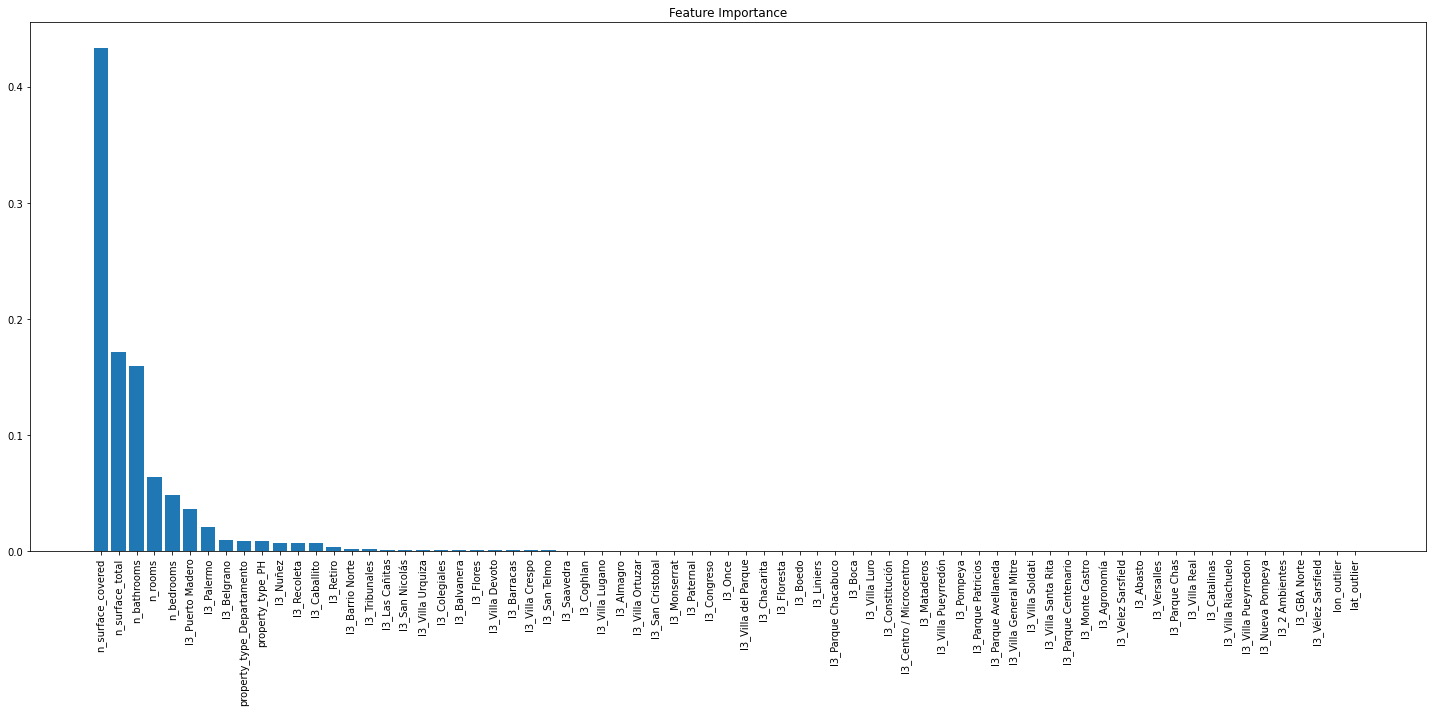

In [55]:
f,a = plt.subplots(figsize=(20,10))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()